In [0]:
from __future__ import print_function

import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
 
import numpy as np

## Downloading the CIFAR100 dataset



*   It has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. 
*   The 100 classes in the CIFAR-100 are grouped into 20 superclasses.
*   But we will not be using the whole dataset, as we need a good mixture of human and non human images.
*   We will be using (people, aquatic mammals, fish, large carnivores) superclasses.
*   [CIFAR Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)








In [0]:
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='coarse')

## Exploring and Preprocessing



*   The images have lables such as 'people', 'fish', etc which we can not use.

*   Hence, we will convert the lables to 'Human' and 'Not Human'




In [165]:
num_classes = len(np.unique(y_train))
num_classes

20

In [166]:
from keras.datasets import cifar100
from keras.utils import to_categorical

# one hot encode target values
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [0]:
class_names = ['aquatic mammals','fish','flowers','food containers','fruit and vegetables',
               'household electrical devices','household furniture','insects','large carnivores','large man-made outdoor things',
               'large natural outdoor scenes','large omnivores and herbivores','medium-sized mammals','non-insect invertebrates',
              'people','reptiles','small mammals','trees','vehicles 1', 'vehicles 2']

0
aquatic mammals
(2500, 32, 32, 3)
(32, 32, 3)
1
fish
(2500, 32, 32, 3)
(32, 32, 3)
2
flowers
(2500, 32, 32, 3)
(32, 32, 3)
3
food containers
(2500, 32, 32, 3)
(32, 32, 3)
4
fruit and vegetables
(2500, 32, 32, 3)
(32, 32, 3)
5
household electrical devices
(2500, 32, 32, 3)
(32, 32, 3)
6
household furniture
(2500, 32, 32, 3)
(32, 32, 3)
7
insects
(2500, 32, 32, 3)
(32, 32, 3)
8
large carnivores
(2500, 32, 32, 3)
(32, 32, 3)
9
large man-made outdoor things
(2500, 32, 32, 3)
(32, 32, 3)
10
large natural outdoor scenes
(2500, 32, 32, 3)
(32, 32, 3)
11
large omnivores and herbivores
(2500, 32, 32, 3)
(32, 32, 3)
12
medium-sized mammals
(2500, 32, 32, 3)
(32, 32, 3)
13
non-insect invertebrates
(2500, 32, 32, 3)
(32, 32, 3)
14
people
(2500, 32, 32, 3)
(32, 32, 3)
15
reptiles
(2500, 32, 32, 3)
(32, 32, 3)
16
small mammals
(2500, 32, 32, 3)
(32, 32, 3)
17
trees
(2500, 32, 32, 3)
(32, 32, 3)
18
vehicles 1
(2500, 32, 32, 3)
(32, 32, 3)
19
vehicles 2
(2500, 32, 32, 3)
(32, 32, 3)


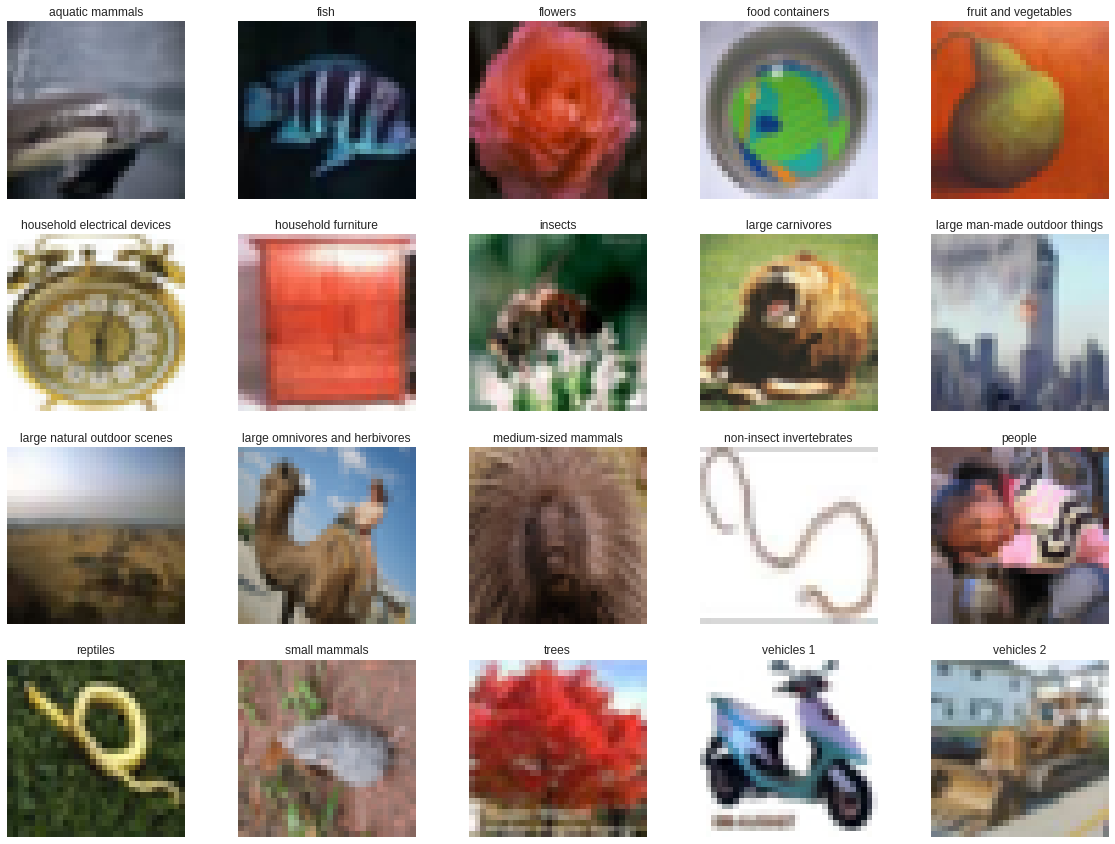

In [168]:
fig = plt.figure(figsize=(20,15))
for i in range(num_classes):
    print(i)
    print((class_names[i]))
    ax = fig.add_subplot(4, 5, 1 + i, xticks=[], yticks=[])
    
    #Get 1st image row id for each class
    idx = np.where(y_train[:]==i)[0]
    
    #Get features of the 1st image for each class
    features_idx = x_train[idx,::]
    
    print(np.shape(features_idx))
    #Transpose and plot images
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::], (0, 1, 2))
    ax.set_title(class_names[i])
    print(np.shape(im))
    plt.imshow(im)
    
plt.show()

In [0]:
people_class = class_names.index('people')

In [0]:
non_people_list = ['aquatic mammals','fish','large carnivores']

In [0]:
non_people_classes = [class_names.index(x) for x in non_people_list]

In [178]:
non_people_classes

[0, 1, 8]

In [179]:
class_names[14]

'people'

In [0]:
def subset_datasets(features, labels, people_class, non_people_classes):
  
  #
  people_idx = np.where(labels[:]==people_class)[0]
  print("Number of people images: ",np.shape(people_idx))
  #print((people_idx))

  #
  mask = np.isin(labels[:],(non_people_classes))
  non_people_idx = np.where(mask)[0]
  print("Number of non people images: ",np.shape(non_people_idx))
  #print((non_people_idx))
  
  #
  index = np.append(people_idx, non_people_idx)
  x_train_subsetted = (features[index])
  y_train_subsetted = (labels[index])
  
  #Convert previous labels to 0: non people and 1: people
  y_train_subsetted = np.where(y_train_subsetted == people_class, 1, 0)
  
  return x_train_subsetted, y_train_subsetted


In [181]:
x_train, y_train = subset_datasets(x_train, y_train, people_class, non_people_classes)
x_test, y_test = subset_datasets(x_test, y_test, people_class, non_people_classes)

Number of people images:  (2500,)
Number of non people images:  (7500,)
Number of people images:  (500,)
Number of non people images:  (1500,)


In [0]:
class_names = ['not people','people']
num_classes = len(class_names)

0
not people
(7500, 32, 32, 3)
(32, 32, 3)
1
people
(2500, 32, 32, 3)
(32, 32, 3)


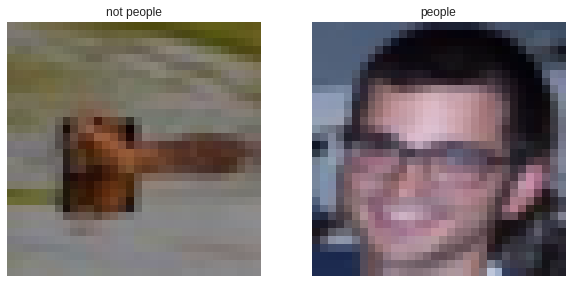

In [184]:
fig = plt.figure(figsize=(10,7))
for i in range(num_classes):
    print(i)
    print((class_names[i]))
    ax = fig.add_subplot(1, 2, 1 + i, xticks=[], yticks=[])
    
    #Get 1st image row id for each class
    idx = np.where(y_train_subsetted[:]==i)[0]
    
    #Get features of the 1st image for each class
    features_idx = x_train_subsetted[idx,::]
    
    print(np.shape(features_idx))
    #Transpose and plot images
    img_num = np.random.randint(features_idx.shape[0])
    
    #Remove
    im = np.transpose(features_idx[img_num,::], (0, 1, 2))
    ax.set_title(class_names[i])
    print(np.shape(im))
    plt.imshow(im)
    
plt.show()

## Normalizing

In [0]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Support functions to compute and plot model accuracy, loss and test accuracy

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()


In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

## Model

In [0]:
import time

#Keras, deep learning libraries
from keras.models import Sequential, load_model
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
from keras.datasets import cifar10
import os
import tensorflow as tf
from tensorflow.python.client import device_lib

In [191]:
num_classes

2

In [0]:
# Define the model

#Initialize the model
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(48, (3, 3), padding='same', input_shape=(32, 32, 3), activation = 'relu'))
 
# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(num_classes -1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [193]:

# Train the model

start = time.time()
model_info = model.fit(x_train, y_train, 
                       batch_size=128, epochs=10, 
                       validation_data = (x_test, y_test), 
                       verbose=1)
end = time.time()
model.save("initial_model.h5")


Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 25s 3ms/step - loss: 0.4952 - acc: 0.7808 - val_loss: 0.3903 - val_acc: 0.8415
Epoch 2/10
10000/10000 [==============================] - 25s 2ms/step - loss: 0.3567 - acc: 0.8473 - val_loss: 0.3478 - val_acc: 0.8495
Epoch 3/10
10000/10000 [==============================] - 25s 2ms/step - loss: 0.3223 - acc: 0.8670 - val_loss: 0.3104 - val_acc: 0.8665
Epoch 4/10
10000/10000 [==============================] - 25s 2ms/step - loss: 0.2831 - acc: 0.8857 - val_loss: 0.3058 - val_acc: 0.8725
Epoch 5/10
10000/10000 [==============================] - 25s 2ms/step - loss: 0.2634 - acc: 0.8955 - val_loss: 0.2829 - val_acc: 0.8880
Epoch 6/10
10000/10000 [==============================] - 25s 2ms/step - loss: 0.2347 - acc: 0.9091 - val_loss: 0.3119 - val_acc: 0.8690
Epoch 7/10
10000/10000 [==============================] - 25s 2ms/step - loss: 0.2158 - acc: 0.9190 - val_loss: 0.3049 - val_acc:

## Model evaluation

### Model performance history

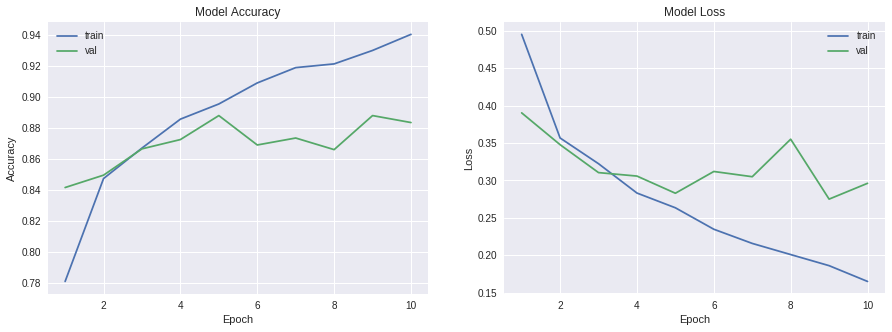

Model took 248.7001988887787 seconds to train


In [194]:
# plot model history
plot_model_history(model_info)
print ("Model took {} seconds to train".format(end - start))

### Model validation accuracy

In [195]:
model.evaluate(x_test, y_test)

2000/2000 [==============================] - 2s 873us/step


[0.29612966215610503, 0.8835]

## VGG - 16 Architecture model

In [0]:
# Define the model

#Initialize the model
model = Sequential()

# Stacked Convolution layer
model.add(Conv2D(48, (3, 3), padding='same', input_shape=(32, 32, 3),activation = 'relu'))

model.add(Conv2D(48, (3, 3),activation = 'relu'))
 
# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout for regularization
model.add(Dropout(0.25))

# Stacked Convolution layer
model.add(Conv2D(96, (3, 3), padding='same',activation = 'relu'))

model.add(Conv2D(96, (3, 3),activation = 'relu'))

# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout for regularization
model.add(Dropout(0.25))

# Stacked Convolution layer
model.add(Conv2D(192, (3, 3), padding='same',activation = 'relu'))

model.add(Conv2D(192, (3, 3),activation = 'relu'))

# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully-connected layer
model.add(Dense(units = 512, activation = 'relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Fully-connected layer
model.add(Dense(units = 256, activation = 'relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output Fully-connected layer
model.add(Dense(num_classes - 1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [197]:

# Train the model

start = time.time()
model_info = model.fit(x_train, y_train, 
                       batch_size=128, epochs=10, 
                       validation_data = (x_test, y_test), 
                       verbose=1)
end = time.time()
model.save("model_vgg_16_architecture.h5")


Train on 10000 samples, validate on 2000 samples
Epoch 1/10
10000/10000 [==============================] - 109s 11ms/step - loss: 0.5643 - acc: 0.7450 - val_loss: 0.4978 - val_acc: 0.7500
Epoch 2/10
10000/10000 [==============================] - 106s 11ms/step - loss: 0.4424 - acc: 0.7853 - val_loss: 0.3657 - val_acc: 0.8305
Epoch 3/10
10000/10000 [==============================] - 107s 11ms/step - loss: 0.3680 - acc: 0.8447 - val_loss: 0.3314 - val_acc: 0.8650
Epoch 4/10
10000/10000 [==============================] - 107s 11ms/step - loss: 0.3515 - acc: 0.8524 - val_loss: 0.3809 - val_acc: 0.8255
Epoch 5/10
10000/10000 [==============================] - 106s 11ms/step - loss: 0.3147 - acc: 0.8715 - val_loss: 0.3004 - val_acc: 0.8890
Epoch 6/10
10000/10000 [==============================] - 106s 11ms/step - loss: 0.2787 - acc: 0.8884 - val_loss: 0.2647 - val_acc: 0.8895
Epoch 7/10
10000/10000 [==============================] - 107s 11ms/step - loss: 0.2627 - acc: 0.8952 - val_loss: 0.2

## Model Evaluation

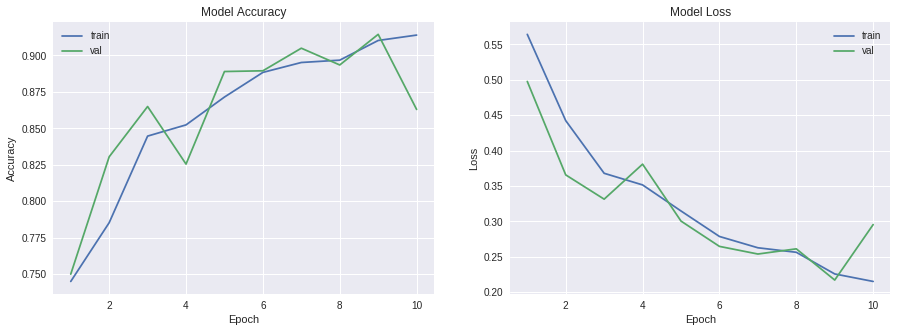

Model took 1067.3477654457092 seconds to train
2000/2000 [==============================] - 6s 3ms/step


[0.29549150478839875, 0.863]

In [198]:
# plot model history
plot_model_history(model_info)
print ("Model took {} seconds to train".format(end - start))
# compute test accuracy
model.evaluate(x_test, y_test)